In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize
# pip install scikit-image

In [2]:
#dataset = pd.read_csv('./data/max.csv')
dataset = pd.read_csv('./data/PosicionesF12022.csv')
pilotos = ['Pilotos','VER','PER','LEC','RUS','HAM','SAI','NOR','OCO','ALO','BOT','VET','RIC','MAG','GAS','STR','SCH','TSU','ZHO','ALB','LAT','VRI','HUL']

In [17]:
c = 0
for i in pilotos:
    print (F'{c}. {i}')
    c += 1
Piloto = input('Seleccione su piloto: ')
SemanaPredecir = input ('Seleccione la semana a predecir')

0. Pilotos
1. VER
2. PER
3. LEC
4. RUS
5. HAM
6. SAI
7. NOR
8. OCO
9. ALO
10. BOT
11. VET
12. RIC
13. MAG
14. GAS
15. STR
16. SCH
17. TSU
18. ZHO
19. ALB
20. LAT
21. VRI
22. HUL
Seleccione su piloto: 2
Seleccione la semana a predecir22


In [18]:
X = dataset.iloc[:,0:1].values
print(X)
y = dataset.iloc[:,int(Piloto)].values
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]]
[ 0 12 18 24 12 19 25 19  0 18  4 12 10 18 10  9 25 18 12 15 10]


In [19]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [20]:
#Ajustar la regresión lineal con el data set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [23]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [24]:
n = len(X)
n

21

{'PER'}


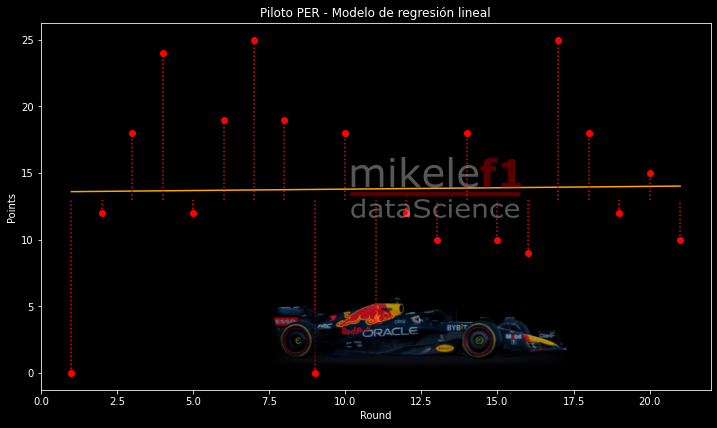

In [44]:
# Visualización 
# lineas de error  

# grafica
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

if Piloto == 1 or Piloto == 2:
    tm = 'RedBullRacing'
elif Piloto == 4 or Piloto == 5:
    tm = 'Mercedes'
elif Piloto == 3 or Piloto == 6:
    tm = 'Ferrari'


car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))

plt.scatter(X, y, color = 'red' )
plt.plot(X, lin_reg.predict(X), color= "orange")

# lineas de error
for i in range(0,n,1):
    y0 = np.min([y[i],int(lin_reg.predict([[i]]))])
    y1 = np.max([y[i],int(lin_reg.predict([[i]]))])
    plt.vlines(X[i],y0,y1, color='red',
               linestyle = 'dotted')

plt.title(f"Piloto {pilotos[int(Piloto)]} - Modelo de regresión lineal")
plt.xlabel('Round')
plt.ylabel('Points')

print({pilotos[int(Piloto)]})

nombrearchivo = pilotos[int(Piloto)]+'rLineal'+SemanaPredecir+'.png'

fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res, xo=255, yo=50, origin='upper', alpha=.70)

plt.savefig(nombrearchivo)
plt.show()


In [32]:
lin_reg.predict([[int(SemanaPredecir)]])

array([14.03809524])

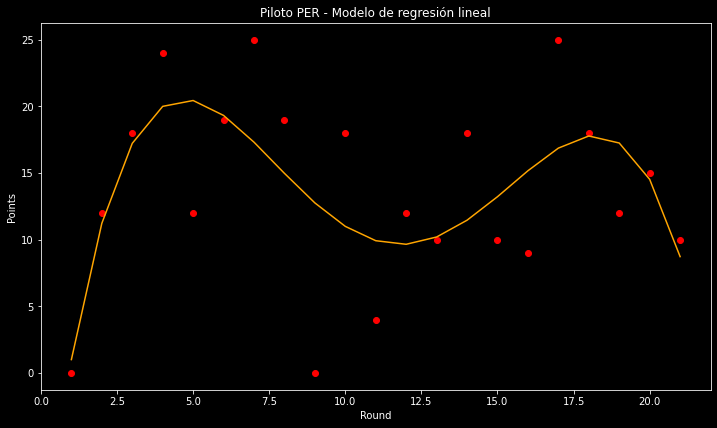

In [33]:

# Visualización
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))



tm = 'RedBullRacing'
plt.scatter(X, y, color = 'red' )
plt.plot(X, lin_reg_2.predict(X_poly), color= "orange")
plt.title(f"Piloto {pilotos[int(Piloto)]} - Modelo de regresión lineal")
plt.xlabel('Round')
plt.ylabel('Points')

plt.show()

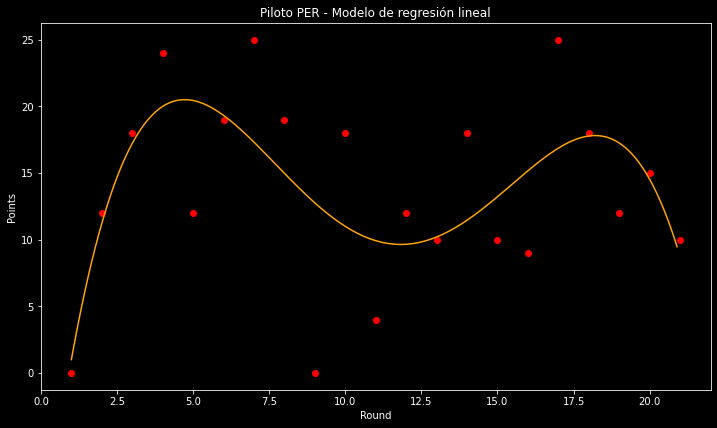

In [34]:
# Visualización
# grafica
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))



X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red' )
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), 
         color= "orange")



plt.title(f"Piloto {pilotos[int(Piloto)]} - Modelo de regresión lineal")
plt.xlabel('Round')
plt.ylabel('Points')


plt.show()

In [29]:
lin_reg.predict([[int(SemanaPredecir)]])


array([14.03809524])

In [30]:
lin_reg_2.predict(poly_reg.fit_transform([[int(SemanaPredecir)]]))

array([-1.10452602])